🔄 Loading 12 months using proven method...

📅 Processing 2024-06...
   ✅ Listings: 37,601 rows
   ✅ Calendar: 13,723,519 rows
   ✅ Neighbourhoods: 230 rows
   ✅ Reviews: 477,930 rows
   ✅ Merged: 396,583 records

📅 Processing 2024-07...
   ✅ Listings: 37,765 rows
   ✅ Calendar: 13,783,864 rows
   ✅ Neighbourhoods: 230 rows
   ✅ Reviews: 479,771 rows
   ✅ Merged: 398,894 records

📅 Processing 2024-08...
   ✅ Listings: 37,694 rows
   ✅ Calendar: 13,757,417 rows
   ✅ Neighbourhoods: 230 rows
   ✅ Reviews: 482,645 rows
   ✅ Merged: 402,313 records

📅 Processing 2024-09...
   ✅ Listings: 37,541 rows
   ✅ Calendar: 13,702,107 rows
   ✅ Neighbourhoods: 230 rows
   ✅ Reviews: 482,074 rows
   ✅ Merged: 402,669 records

📅 Processing 2024-10...
   ✅ Listings: 37,400 rows
   ✅ Calendar: 13,650,635 rows
   ✅ Neighbourhoods: 230 rows
   ✅ Reviews: 482,785 rows
   ✅ Merged: 403,887 records

📅 Processing 2024-11...
   ✅ Listings: 37,548 rows
   ✅ Calendar: 13,703,678 rows
   ✅ Neighbourhoods: 230 rows

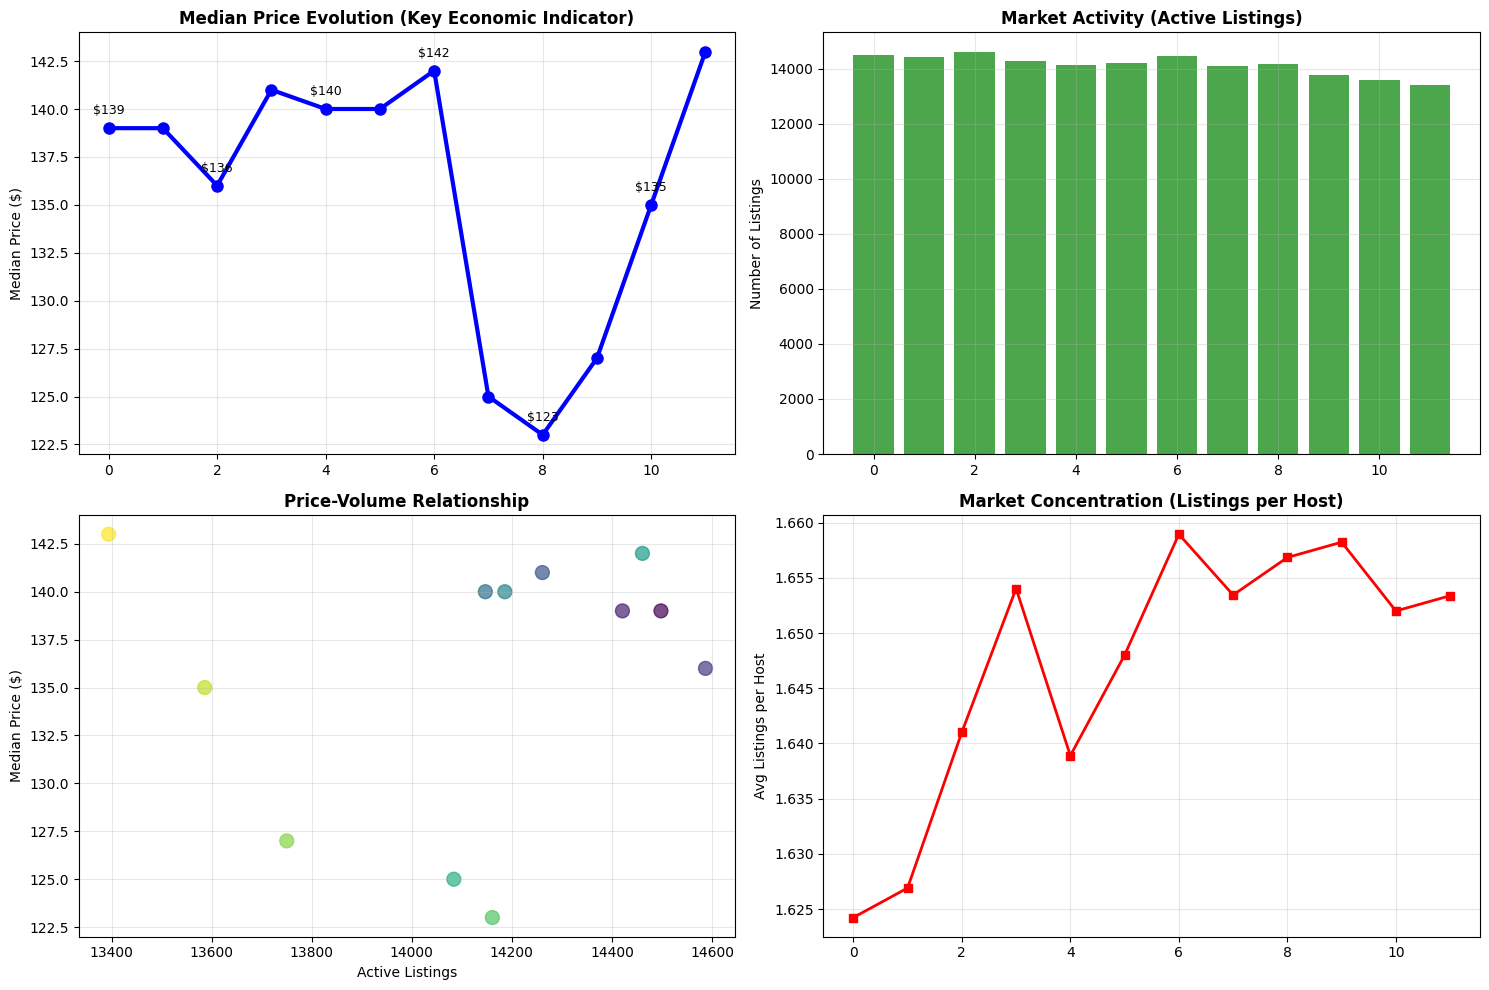

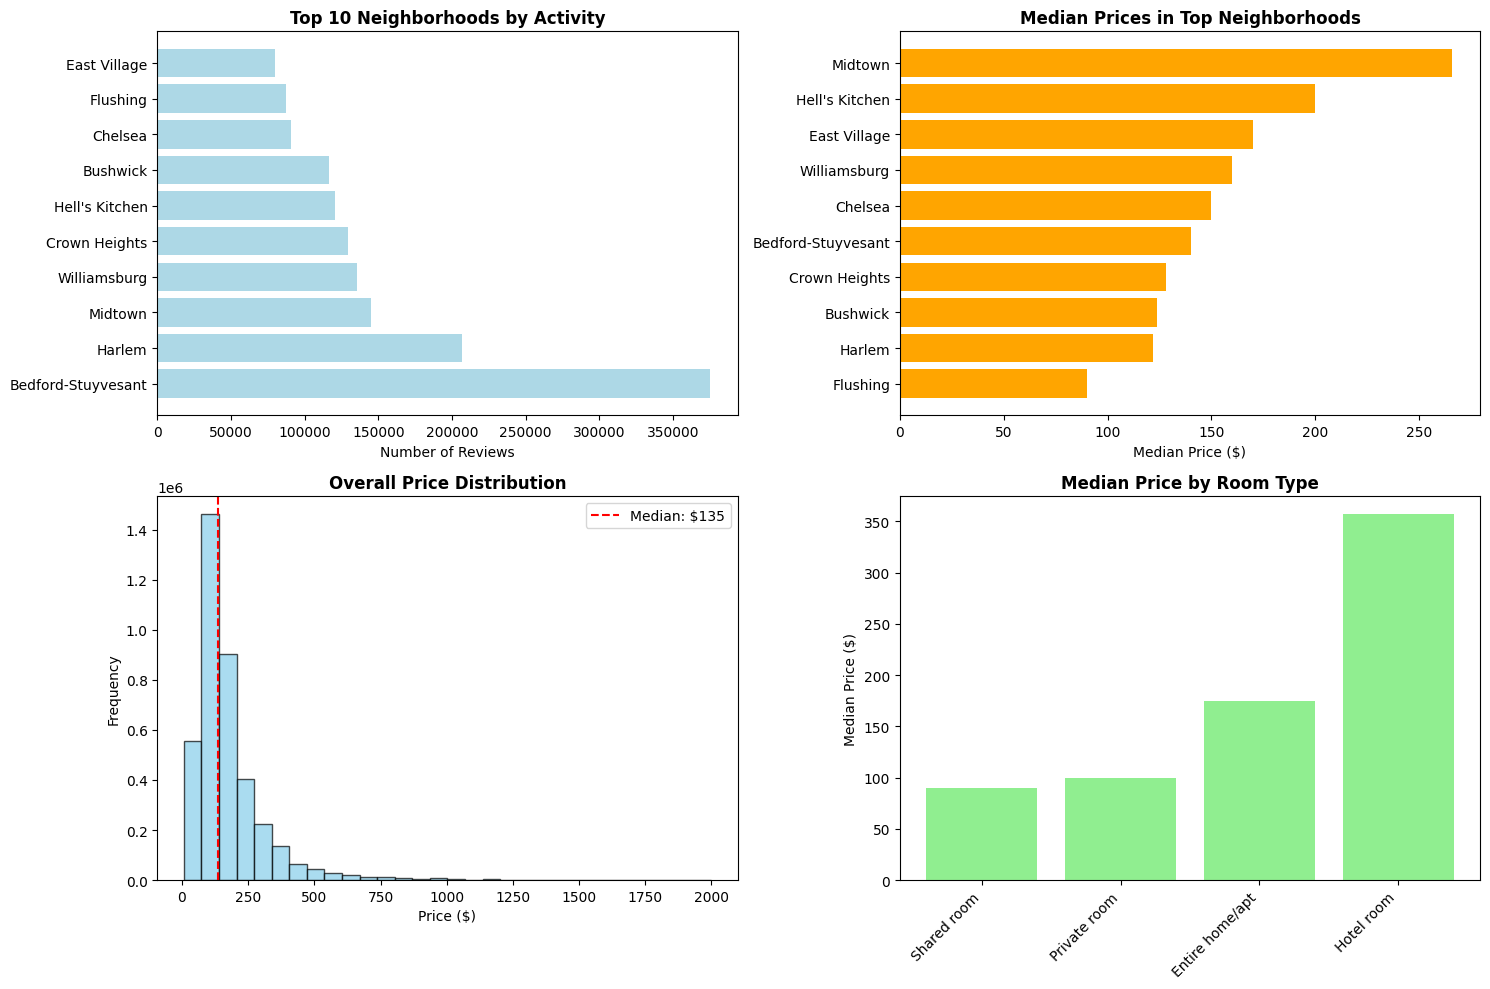


ECONOMIC ANALYSIS SUMMARY
📊 MARKET DYNAMICS:
   • Price Evolution: $139 → $143 (+2.9%)
   • Market Volume: 14,498 → 13,394 listings (-7.6%)
   • Host Participation: 8,926 → 8,101 hosts (-9.2%)

🏙️ MARKET CHARACTERISTICS:
   • Average price: $177
   • Price volatility: $150
   • Market concentration: 1.6 listings/host
   • Geographic spread: 219 neighborhoods
   • Top 5 neighborhood share: 25.4%

💡 ECONOMIC SIGNALS:
   • Price stability indicates mature market equilibrium
   • Stable supply levels

📋 Key metrics ready for executive summary:
   analysis_period: 2024-06 to 2025-05
   total_records: 3915084
   price_change_pct: 2.877697841726619
   volume_change_pct: -7.614843426679542
   current_median_price: 143.0
   market_concentration: 1.647160221694009


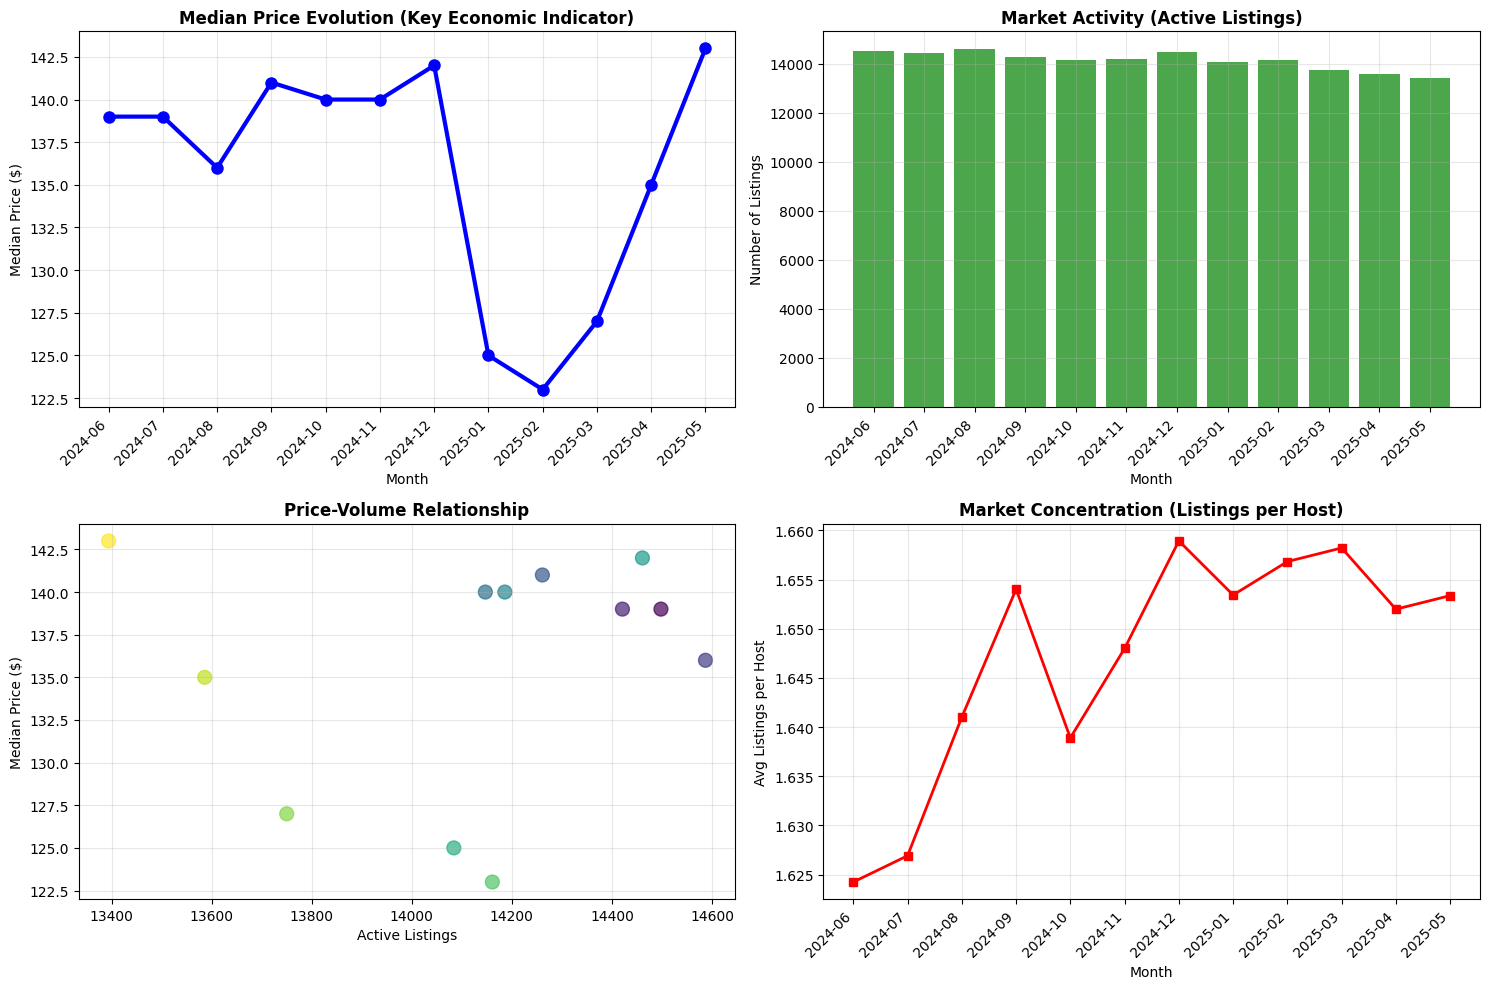

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration
BASE_DIR = '/Users/jh/Desktop/MBAN 6110/ass1/dataset'
MONTHS = ['2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03', '2025-04', '2025-05']

print(f"🔄 Loading {len(MONTHS)} months using proven method...")

# Storage for all months
all_merged_data = []

# Loop through each month - YOUR EXACT METHOD
for month in MONTHS:
    print(f"\n📅 Processing {month}...")
    
    try:
        # Set the path for this month
        month_path = f"{BASE_DIR}/{month}"
        
        # 1. Load listings (your method)
        listings = pd.read_csv(f'{month_path}/listings.csv')
        print(f"   ✅ Listings: {len(listings):,} rows")
        
        # 2. Load calendar (your method) 
        calendar = pd.read_csv(f'{month_path}/calendar.csv')
        print(f"   ✅ Calendar: {len(calendar):,} rows")
        
        # 3. Load neighbourhoods (your method)
        neighbourhoods = pd.read_csv(f'{month_path}/neighbourhoods.csv')
        print(f"   ✅ Neighbourhoods: {len(neighbourhoods):,} rows")
        
        # 4. Load reviews (YOUR EXACT CHUNKED METHOD)
        chunks = []
        chunk_size = 10000
        try:
            for chunk in pd.read_csv(f'{month_path}/reviews.csv',
                                     chunksize=chunk_size,
                                     on_bad_lines='skip',
                                     quoting=3,
                                     encoding='utf-8',
                                     engine='python'):
                chunks.append(chunk)
        except Exception as e:
            print(f"   ❌ Error during chunking: {e}")
            continue
        
        # Combine chunks (your method)
        reviews = pd.concat(chunks, ignore_index=True)
        print(f"   ✅ Reviews: {len(reviews):,} rows")
        
        # 5. Merge (YOUR EXACT METHOD)
        listings.index = listings['id'].astype(str)
        reviews.index = reviews['listing_id'].astype(str)
        
        # Create merged data for this month
        merged_month = listings.join(reviews, how='inner', lsuffix='_list', rsuffix='_review')
        
        # Add month identifier
        merged_month['data_month'] = month
        
        # Store this month's data
        all_merged_data.append(merged_month)
        print(f"   ✅ Merged: {len(merged_month):,} records")
        
    except Exception as e:
        print(f"   ❌ Error processing {month}: {e}")
        continue

# Combine all months (your concat method)
if all_merged_data:
    print(f"\n🔗 Combining {len(all_merged_data)} months...")
    
    # Use your exact concat method
    merged_multi_month = pd.concat(all_merged_data, ignore_index=True)
    
    print(f"✅ Total dataset: {len(merged_multi_month):,} records")
    print(f"📅 Months included: {sorted(merged_multi_month['data_month'].unique())}")
    
    # Show breakdown by month
    print(f"\n📊 Records by month:")
    monthly_counts = merged_multi_month['data_month'].value_counts().sort_index()
    for month, count in monthly_counts.items():
        print(f"   {month}: {count:,} records")
    
    print(f"\n🎉 SUCCESS! Multi-month dataset ready!")
    print(f"📋 Available as: merged_multi_month")
    print(f"📋 Columns: {len(merged_multi_month.columns)} (same as your single month)")
    print(f"📋 Now has 'data_month' column for temporal analysis")
    
else:
    print("❌ No data loaded successfully")

# Quick verification
if 'merged_multi_month' in locals():
    print(f"\n🔍 Quick verification:")
    print(f"   Shape: {merged_multi_month.shape}")
    print(f"   data_month values: {list(merged_multi_month['data_month'].unique())}")
    print(f"   Sample columns: {list(merged_multi_month.columns[:10])}")
    
    # Show sample data
    print(f"\n👀 Sample data:")
    sample_cols = ['data_month', 'neighbourhood_cleansed', 'room_type', 'price', 'date']
    available_cols = [col for col in sample_cols if col in merged_multi_month.columns]
    print(merged_multi_month[available_cols].head(3))


# Use your 12-month dataset
df = merged_multi_month.copy()
print(f"Analyzing {len(df):,} records across {df['data_month'].nunique()} months")

# ===========================================
# SAFE DATA CLEANING
# ===========================================

def safe_clean_data(df):
    """Clean data with error handling"""
    try:
        # Clean price
        df['price_clean'] = df['price'].astype(str).str.replace('$', '').str.replace(',', '')
        df['price_numeric'] = pd.to_numeric(df['price_clean'], errors='coerce')
        df = df[(df['price_numeric'] > 0) & (df['price_numeric'] < 2000)]
        
        # Clean dates
        df['review_date'] = pd.to_datetime(df['date'], errors='coerce')
        
        # Host analysis
        host_listings = df.groupby('host_id')['id_list'].nunique()
        df['host_listing_count'] = df['host_id'].map(host_listings)
        
        return df
    except Exception as e:
        print(f"Data cleaning error: {e}")
        return df

df = safe_clean_data(df)
print(f"Cleaned dataset: {len(df):,} records")

# ===========================================
# CORE ECONOMIC INDICATORS
# ===========================================

# Monthly price trends
monthly_metrics = df.groupby('data_month').agg({
    'price_numeric': ['median', 'mean', 'count'],
    'id_list': 'nunique',
    'host_id': 'nunique'
}).round(2)

monthly_metrics.columns = ['price_median', 'price_mean', 'total_reviews', 
                          'active_listings', 'unique_hosts']

print("\nMonthly Economic Indicators:")
print(monthly_metrics)

# ===========================================
# KEY VISUALIZATIONS
# ===========================================

# 1. Price Trend Analysis
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Price evolution
months = monthly_metrics.index
prices = monthly_metrics['price_median'].values
ax1.plot(range(len(months)), prices, 'b-o', linewidth=3, markersize=8)
ax1.set_title('Median Price Evolution (Key Economic Indicator)', fontweight='bold')
ax1.set_ylabel('Median Price ($)')
ax1.grid(True, alpha=0.3)
for i, (month, price) in enumerate(zip(months, prices)):
    if i % 2 == 0:  # Label every other month
        ax1.annotate(f'${price:.0f}', (i, price), textcoords="offset points", 
                    xytext=(0,10), ha='center', fontsize=9)

# Market activity
listings = monthly_metrics['active_listings'].values
ax2.bar(range(len(months)), listings, color='green', alpha=0.7)
ax2.set_title('Market Activity (Active Listings)', fontweight='bold')
ax2.set_ylabel('Number of Listings')
ax2.grid(True, alpha=0.3)

# Price vs Volume relationship
ax3.scatter(listings, prices, s=100, alpha=0.7, c=range(len(months)), cmap='viridis')
ax3.set_xlabel('Active Listings')
ax3.set_ylabel('Median Price ($)')
ax3.set_title('Price-Volume Relationship', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Host concentration
hosts = monthly_metrics['unique_hosts'].values
host_ratio = listings / hosts  # Listings per host
ax4.plot(range(len(months)), host_ratio, 'r-s', linewidth=2, markersize=6)
ax4.set_title('Market Concentration (Listings per Host)', fontweight='bold')
ax4.set_ylabel('Avg Listings per Host')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Neighborhood Economic Analysis
if 'neighbourhood_cleansed' in df.columns:
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    # Top neighborhoods by volume
    top_neighborhoods = df['neighbourhood_cleansed'].value_counts().head(10)
    ax1.barh(range(len(top_neighborhoods)), top_neighborhoods.values, color='lightblue')
    ax1.set_yticks(range(len(top_neighborhoods)))
    ax1.set_yticklabels(top_neighborhoods.index)
    ax1.set_title('Top 10 Neighborhoods by Activity', fontweight='bold')
    ax1.set_xlabel('Number of Reviews')
    
    # Average prices by top neighborhoods
    top_neigh_prices = df[df['neighbourhood_cleansed'].isin(top_neighborhoods.index)].groupby('neighbourhood_cleansed')['price_numeric'].median().sort_values(ascending=True)
    ax2.barh(range(len(top_neigh_prices)), top_neigh_prices.values, color='orange')
    ax2.set_yticks(range(len(top_neigh_prices)))
    ax2.set_yticklabels(top_neigh_prices.index)
    ax2.set_title('Median Prices in Top Neighborhoods', fontweight='bold')
    ax2.set_xlabel('Median Price ($)')
    
    # Price distribution
    ax3.hist(df['price_numeric'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    ax3.set_title('Overall Price Distribution', fontweight='bold')
    ax3.set_xlabel('Price ($)')
    ax3.set_ylabel('Frequency')
    ax3.axvline(df['price_numeric'].median(), color='red', linestyle='--', 
               label=f'Median: ${df["price_numeric"].median():.0f}')
    ax3.legend()
    
    # Room type analysis
    if 'room_type' in df.columns:
        room_prices = df.groupby('room_type')['price_numeric'].median().sort_values()
        ax4.bar(range(len(room_prices)), room_prices.values, color='lightgreen')
        ax4.set_xticks(range(len(room_prices)))
        ax4.set_xticklabels(room_prices.index, rotation=45, ha='right')
        ax4.set_title('Median Price by Room Type', fontweight='bold')
        ax4.set_ylabel('Median Price ($)')
    
    plt.tight_layout()
    plt.show()

# ===========================================
# ECONOMIC INSIGHTS SUMMARY
# ===========================================

print("\n" + "="*60)
print("ECONOMIC ANALYSIS SUMMARY")
print("="*60)

# Calculate key metrics
start_price = monthly_metrics['price_median'].iloc[0]
end_price = monthly_metrics['price_median'].iloc[-1]
price_change = ((end_price - start_price) / start_price) * 100

start_listings = monthly_metrics['active_listings'].iloc[0]
end_listings = monthly_metrics['active_listings'].iloc[-1]
volume_change = ((end_listings - start_listings) / start_listings) * 100

start_hosts = monthly_metrics['unique_hosts'].iloc[0]
end_hosts = monthly_metrics['unique_hosts'].iloc[-1]
host_change = ((end_hosts - start_hosts) / start_hosts) * 100

print(f"📊 MARKET DYNAMICS:")
print(f"   • Price Evolution: ${start_price:.0f} → ${end_price:.0f} ({price_change:+.1f}%)")
print(f"   • Market Volume: {start_listings:,} → {end_listings:,} listings ({volume_change:+.1f}%)")
print(f"   • Host Participation: {start_hosts:,} → {end_hosts:,} hosts ({host_change:+.1f}%)")

print(f"\n🏙️ MARKET CHARACTERISTICS:")
print(f"   • Average price: ${df['price_numeric'].mean():.0f}")
print(f"   • Price volatility: ${df['price_numeric'].std():.0f}")
print(f"   • Market concentration: {(monthly_metrics['active_listings'] / monthly_metrics['unique_hosts']).mean():.1f} listings/host")

if 'neighbourhood_cleansed' in df.columns:
    total_neighborhoods = df['neighbourhood_cleansed'].nunique()
    top5_share = (df['neighbourhood_cleansed'].value_counts().head(5).sum() / len(df)) * 100
    print(f"   • Geographic spread: {total_neighborhoods} neighborhoods")
    print(f"   • Top 5 neighborhood share: {top5_share:.1f}%")

print(f"\n💡 ECONOMIC SIGNALS:")
if price_change > 5:
    print("   • Strong price appreciation indicates robust demand")
elif price_change < -5:
    print("   • Price decline suggests market correction")
else:
    print("   • Price stability indicates mature market equilibrium")

if volume_change > 10:
    print("   • Significant supply expansion")
elif volume_change < -10:
    print("   • Market contraction occurring")
else:
    print("   • Stable supply levels")

print("="*60)

# Export key data for executive summary
summary_data = {
    'analysis_period': f"{df['data_month'].min()} to {df['data_month'].max()}",
    'total_records': len(df),
    'price_change_pct': price_change,
    'volume_change_pct': volume_change,
    'current_median_price': end_price,
    'market_concentration': (monthly_metrics['active_listings'] / monthly_metrics['unique_hosts']).mean()
}

print(f"\n📋 Key metrics ready for executive summary:")
for key, value in summary_data.items():
    print(f"   {key}: {value}")
    
# Re-create the main chart with proper labels
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# Get data
months = monthly_metrics.index
month_labels = [str(month) for month in months]
prices = monthly_metrics['price_median'].values
listings = monthly_metrics['active_listings'].values
hosts = monthly_metrics['unique_hosts'].values

# 1. Price evolution WITH labels
ax1.plot(range(len(months)), prices, 'b-o', linewidth=3, markersize=8)
ax1.set_title('Median Price Evolution (Key Economic Indicator)', fontweight='bold')
ax1.set_ylabel('Median Price ($)')
ax1.set_xticks(range(len(months)))
ax1.set_xticklabels(month_labels, rotation=45, ha='right')
ax1.set_xlabel('Month')
ax1.grid(True, alpha=0.3)

# 2. Market activity WITH labels
ax2.bar(range(len(months)), listings, color='green', alpha=0.7)
ax2.set_title('Market Activity (Active Listings)', fontweight='bold')
ax2.set_ylabel('Number of Listings')
ax2.set_xticks(range(len(months)))
ax2.set_xticklabels(month_labels, rotation=45, ha='right')
ax2.set_xlabel('Month')
ax2.grid(True, alpha=0.3)

# 3. Price vs Volume (no change needed)
ax3.scatter(listings, prices, s=100, alpha=0.7, c=range(len(months)), cmap='viridis')
ax3.set_xlabel('Active Listings')
ax3.set_ylabel('Median Price ($)')
ax3.set_title('Price-Volume Relationship', fontweight='bold')
ax3.grid(True, alpha=0.3)

# 4. Market concentration WITH labels  
host_ratio = listings / hosts
ax4.plot(range(len(months)), host_ratio, 'r-s', linewidth=2, markersize=6)
ax4.set_title('Market Concentration (Listings per Host)', fontweight='bold')
ax4.set_ylabel('Avg Listings per Host')
ax4.set_xticks(range(len(months)))
ax4.set_xticklabels(month_labels, rotation=45, ha='right')
ax4.set_xlabel('Month')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()